## Project on Fruits
 ## Define business problem
 Efficient and accurate classification of fruit types based on their external appearance features.
 ### Defining the Question
 1. How can we automate and streamline the classification of various fruit types based on their external appearance features?

 2.What are the most important external appearance features that determine the type of fruit?

 3.How can we improve the accuracy and performance of fruit classification models beyond the achieved 92.8% using logistic regression, artificial neural networks, and stacking models?


 #### Data
 Our dataset was from Kaggle  https://www.muratkoklu.com/datasets/ 898 columns and 35 rows
 ### Data grcery



 ## Experimental design

 1.Data Collection:

Obtain a dataset of 898 images of seven different date fruit varieties (Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai) through a computer vision system (CVS).
2.Data Preprocessing:

Apply image processing techniques to preprocess the images and extract relevant features.
Extract a total of 34 features, including morphological features, shape, and color, from the preprocessed images.
3.Model Development:

Select machine learning methods for classification, including logistic regression (LR) and artificial neural network (ANN).
Split the dataset into training and testing sets.
Train the LR and ANN models using the training set and optimize their respective parameters.
Evaluate the performance of each model using the testing set, considering metrics such as accuracy.
4.Stacking Model:

Combine the LR and ANN models to create a stacking model.
Utilize the predictions of LR and ANN models as input features for the stacking model.
Train the stacking model using the training set and optimize its parameters.
Evaluate the performance of the stacking model using the testing set, considering metrics such as accuracy.
5.Performance Evaluation:

Compare the performance of LR, ANN, and the stacking model based on their respective accuracies.
Analyze the results to determine the effectiveness of each method and the improvement achieved through the stacking model.
6.Conclusion:

Conclude the study by highlighting the success of machine learning methods in classifying date fruit types based on their external appearance features.
Discuss the implications of the findings and potential applications of the developed models.




In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [54]:
# loading our datasey
data=pd.read_csv('df_arabica_clean.csv')
fruit_data = pd.read_excel('C:\\Users\\mullah\\Documents\\hackerboy\\Date_Fruit_Datasets\\Date_Fruit_Datasets.xlsx')

In [33]:
# cheaking the head of our dataset
data.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [37]:
data.info

<bound method Series.info of Unnamed: 0                0.000000
ID                        0.000000
Country of Origin         0.000000
Farm Name                 0.966184
Lot Number                0.483092
Mill                      1.449275
ICO Number               63.768116
Company                   0.000000
Altitude                  0.483092
Region                    0.966184
Producer                  0.483092
Number of Bags            0.000000
Bag Weight                0.000000
In-Country Partner        0.000000
Harvest Year              0.000000
Grading Date              0.000000
Owner                     0.000000
Variety                   2.898551
Status                    0.000000
Processing Method         2.415459
Aroma                     0.000000
Flavor                    0.000000
Aftertaste                0.000000
Acidity                   0.000000
Body                      0.000000
Balance                   0.000000
Uniformity                0.000000
Clean Cup                 

In [34]:
data= data.isnull().sum()/len(data)*100
data



Unnamed: 0                0.000000
ID                        0.000000
Country of Origin         0.000000
Farm Name                 0.966184
Lot Number                0.483092
Mill                      1.449275
ICO Number               63.768116
Company                   0.000000
Altitude                  0.483092
Region                    0.966184
Producer                  0.483092
Number of Bags            0.000000
Bag Weight                0.000000
In-Country Partner        0.000000
Harvest Year              0.000000
Grading Date              0.000000
Owner                     0.000000
Variety                   2.898551
Status                    0.000000
Processing Method         2.415459
Aroma                     0.000000
Flavor                    0.000000
Aftertaste                0.000000
Acidity                   0.000000
Body                      0.000000
Balance                   0.000000
Uniformity                0.000000
Clean Cup                 0.000000
Sweetness           

In [35]:
# Assuming 'data' is your dataset
data.fillna(method='bfill', inplace=True)
data

Unnamed: 0                0.000000
ID                        0.000000
Country of Origin         0.000000
Farm Name                 0.966184
Lot Number                0.483092
Mill                      1.449275
ICO Number               63.768116
Company                   0.000000
Altitude                  0.483092
Region                    0.966184
Producer                  0.483092
Number of Bags            0.000000
Bag Weight                0.000000
In-Country Partner        0.000000
Harvest Year              0.000000
Grading Date              0.000000
Owner                     0.000000
Variety                   2.898551
Status                    0.000000
Processing Method         2.415459
Aroma                     0.000000
Flavor                    0.000000
Aftertaste                0.000000
Acidity                   0.000000
Body                      0.000000
Balance                   0.000000
Uniformity                0.000000
Clean Cup                 0.000000
Sweetness           

In [47]:
data.describe()

count    41.000000
mean      1.802757
std       9.939855
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      63.768116
dtype: float64

In [55]:
fruit_data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [57]:
fruit_data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [69]:
fruit_data.shape

(898, 35)

In [59]:
fruit_data.isnull().sum()/len(fruit_data)*100

AREA             0.0
PERIMETER        0.0
MAJOR_AXIS       0.0
MINOR_AXIS       0.0
ECCENTRICITY     0.0
EQDIASQ          0.0
SOLIDITY         0.0
CONVEX_AREA      0.0
EXTENT           0.0
ASPECT_RATIO     0.0
ROUNDNESS        0.0
COMPACTNESS      0.0
SHAPEFACTOR_1    0.0
SHAPEFACTOR_2    0.0
SHAPEFACTOR_3    0.0
SHAPEFACTOR_4    0.0
MeanRR           0.0
MeanRG           0.0
MeanRB           0.0
StdDevRR         0.0
StdDevRG         0.0
StdDevRB         0.0
SkewRR           0.0
SkewRG           0.0
SkewRB           0.0
KurtosisRR       0.0
KurtosisRG       0.0
KurtosisRB       0.0
EntropyRR        0.0
EntropyRG        0.0
EntropyRB        0.0
ALLdaub4RR       0.0
ALLdaub4RG       0.0
ALLdaub4RB       0.0
Class            0.0
dtype: float64

In [64]:
fruit_data.columns


Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

## EDA and viulization

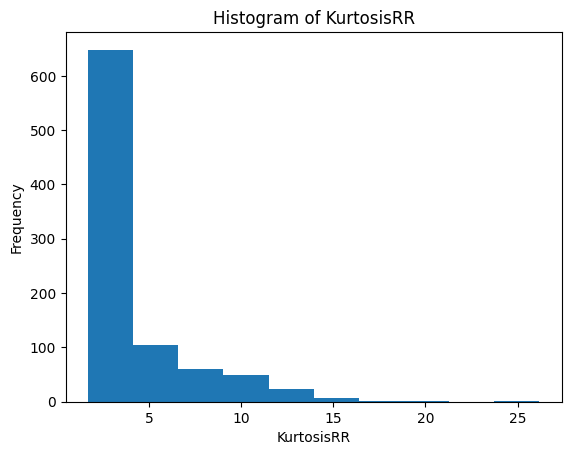

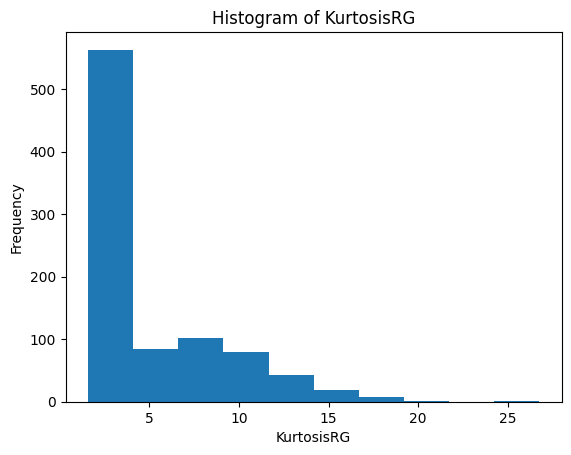

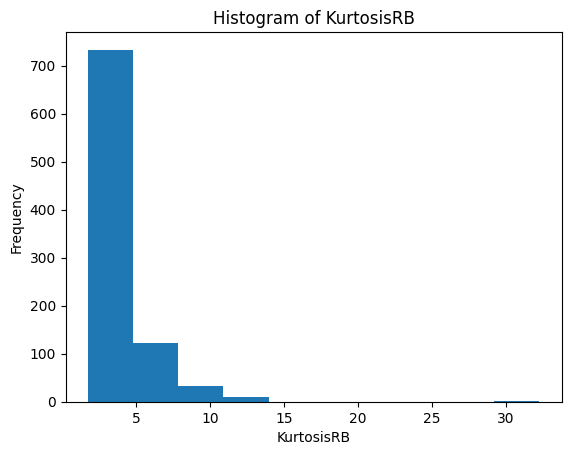

In [67]:
# Plot histogram for KurtosisRR
plt.hist(fruit_data['KurtosisRR'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('KurtosisRR')
plt.ylabel('Frequency')
plt.title('Histogram of KurtosisRR')
plt.show()

# Plot histogram for KurtosisRG
plt.hist(fruit_data['KurtosisRG'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('KurtosisRG')
plt.ylabel('Frequency')
plt.title('Histogram of KurtosisRG')
plt.show()

# Plot histogram for KurtosisRB
plt.hist(fruit_data['KurtosisRB'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('KurtosisRB')
plt.ylabel('Frequency')
plt.title('Histogram of KurtosisRB')
plt.show()